# Epidimiology Toy Model

Assume $S/N=1$ and $\beta$ is constant

$$
\frac{dI}{dt} = (\beta - \gamma)I
$$

$$
I = I_0 e^{(R_0 - 1) \gamma t}
$$

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as po

In [2]:
def active_infections(R, T=14, I0=10000, ndays=365, name=None):
    t = np.arange(0, ndays + 1)
    gamma = 1 / T
    I = I0 * np.exp((R - 1) * gamma * t)
    I = I.round()
    if name is None:
        name = f'R={R}, T={T}'
    I = pd.DataFrame(data={'Day' : t, 
                           'Model' : name,
                           'R' : R,
                           'T' : T,
                           'I0' : I0,
                           'Active Infections' : I})
    return I

In [11]:
def get_active_infections(R_vals=[0.2, 0.5, 0.8], T_vals=[7, 14, 21, 28], I0=10000, ndays=365):
    active = pd.DataFrame()
    for T in T_vals:
        for R in R_vals:      
            I = active_infections(R, T, I0, ndays)
            active = pd.concat([active, I], axis=0)
    return active

In [12]:
active = get_active_infections()

In [13]:
def plot_active_infections(active, title=None, width=700, height=500):

    fig = px.line(active, x='Day', y='Active Infections', color='R', animation_frame='T',                  
                  animation_group='R', labels={'T' : 'Infectious Period (days) '},
                  title=title, width=width, height=height)
    for i, data in enumerate(fig.data):
        data['hovertemplate'] = (data['hovertemplate'].replace('R=', 'R = ')
                                 .replace('Infectious Period (days) =', 'Infectious Period (days) = ')
                                 .replace('Day=', 'Day = ')
                                 .replace('Active Infections=', 'Active Infections = ')
                                )

    days = sorted(active['Day'].unique())
    I0 = active['I0'].unique()[0]
    y = 0.1 * I0 * np.ones(len(days))
    fig.add_trace(go.Scatter(x=days, y=y, name='10% of Initial', mode='lines', 
                             line_dash='dash', line_color='gray'))
    fig.data[-1]['hovertemplate'] = 'Day = %{x}<br>Active Infections = 10% of Initial'
    
    return fig

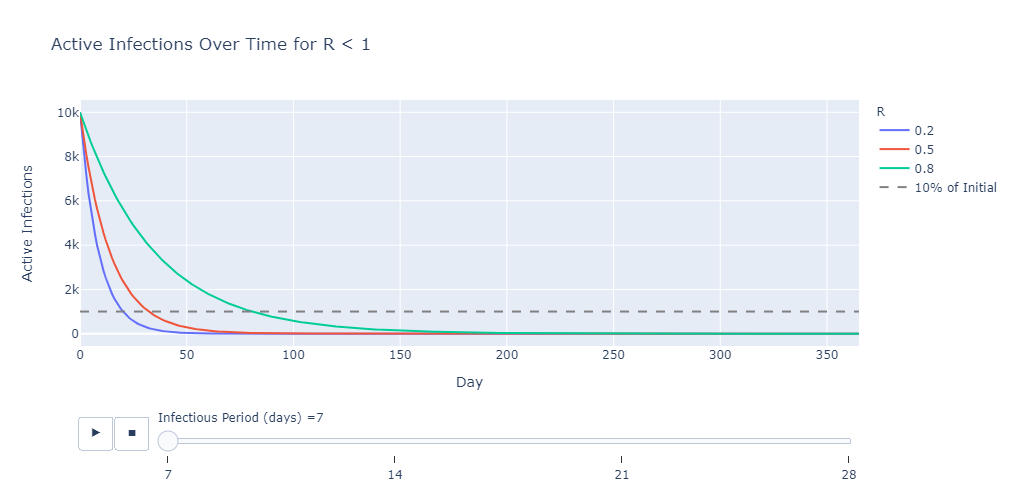

In [15]:
fig = plot_active_infections(active, title='Active Infections Over Time for R < 1')
po.iplot(fig)